In [234]:
import os,pandas as pd, numpy as np
import scipy.stats as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import savefig

In [235]:
source_dir = os.path.join('..','derivatives','0.4.joined')

In [303]:
data = pd.read_csv(os.path.join(source_dir,'all_subject_level.csv'))
data['Condition'] = data['Condition'].replace({1:'Annotated',2:'Video',3:'Original'})
data['AgeGroup'] = data['AgeGroup'].replace({1:'YA',2:'OA'})
data['Gender'] = data['Gender'].replace({1:'M',2:'F'})
data['nb_CoR'] = data['nb_CoR']*100
data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']] = data[['SciEdu_HS','SciEdu_UGrad','SciEdu_Grad']].replace({np.nan:0})
data

,sub,Condition,Age,Gender,EduYears,SciEdu_HS,SciEdu_UGrad,SciEdu_Grad,AgeGroup,comp_t1,...,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum,O1_sum,O2_sum,O3_sum,O4_sum,O5_sum,O6_sum
0,101,Annotated,20.0,F,14.0,4,7,0.0,YA,9.0,...,87,30.0,16,70,9.0,14.0,11.0,11.0,10.0,15.0
1,102,Video,19.0,F,12.0,3,3,0.0,YA,10.0,...,83,26.0,16,69,17.0,13.0,14.0,17.0,15.0,13.0
2,103,Original,18.0,M,12.0,3,0,0.0,YA,7.0,...,76,28.0,15,61,16.0,13.0,12.0,16.0,9.0,12.0
3,104,Annotated,18.0,M,12.0,4,0,0.0,YA,9.0,...,97,28.0,16,77,17.0,13.0,12.0,14.0,11.0,11.0
4,105,Video,18.0,M,12.0,6,0,0.0,YA,8.0,...,82,28.0,15,62,17.0,9.0,18.0,14.0,12.0,11.0
5,106,Original,18.0,M,12.0,4,0,0.0,YA,12.0,...,77,26.0,14,70,15.0,17.0,8.0,13.0,10.0,12.0
6,107,Annotated,18.0,F,12.0,4,1,0.0,YA,10.0,...,87,23.0,16,62,20.0,12.0,12.0,13.0,6.0,15.0
7,108,Video,18.0,F,12.0,5,0,0.0,YA,6.0,...,76,22.0,15,63,16.0,13.0,13.0,15.0,14.0,11.0
8,109,Original,18.0,F,13.0,5,2,0.0,YA,9.0,...,95,34.0,16,86,20.0,12.0,12.0,8.0,8.0,12.0
9,110,Annotated,19.0,M,12.0,4,0,0.0,YA,10.0,...,78,28.0,14,70,15.0,13.0,10.0,12.0,7.0,10.0


In [237]:
data.groupby(['AgeGroup','Condition']).count()['sub']

AgeGroup  Condition
OA        Annotated     6
          Original      4
          Video         3
YA        Annotated    15
          Original     17
          Video        17
Name: sub, dtype: int64

In [238]:
data.groupby(['AgeGroup','Condition']).mean()['Age']

AgeGroup  Condition
OA        Annotated    71.000000
          Original     72.333333
          Video        69.666667
YA        Annotated    20.466667
          Original     18.812500
          Video        21.117647
Name: Age, dtype: float64

In [239]:
data.groupby(['AgeGroup','Condition']).mean()['comp_change']

AgeGroup  Condition
OA        Annotated    1.500000
          Original     2.750000
          Video        4.666667
YA        Annotated    2.400000
          Original     3.764706
          Video        3.764706
Name: comp_change, dtype: float64

# Group comparisons

In [240]:
vars_of_interest = ['comp_t1','comp_t2','comp_change','nb_CoR','nb_RT',
                    'procspd_RT','NFCS_sum','TSSI_sum',
                    'vocab_sum','SciLit_sum','SciTude_sum']

In [241]:
grps_of_interest = ['Condition','AgeGroup',['AgeGroup','Condition']]

# Correlations

### Comprehension Change -> everything
#### Pearson r

In [304]:
data=data[vars_of_interest].dropna()

In [305]:
corr_df = pd.DataFrame()
for c in vars_of_interest:
    for d in vars_of_interest:
        corr_df.loc[c,d] = sp.pearsonr(data[c],data[d])[0]
corr_df

,comp_t1,comp_t2,comp_change,nb_CoR,nb_RT,procspd_RT,NFCS_sum,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum
comp_t1,1.000000,0.524532,-0.505862,0.062516,0.229700,0.013208,0.186879,0.013062,0.514044,0.133977,0.279201
comp_t2,0.524532,1.000000,0.469081,-0.003677,0.199984,-0.365093,0.279250,0.064810,0.370175,0.079033,0.397413
comp_change,-0.505862,0.469081,1.000000,-0.068574,-0.035649,-0.383607,0.089080,0.052114,-0.158167,-0.058901,0.113035
nb_CoR,0.062516,-0.003677,-0.068574,1.000000,-0.311942,-0.167805,0.035344,0.029049,-0.036433,0.088113,-0.140652
nb_RT,0.229700,0.199984,-0.035649,-0.311942,1.000000,0.070338,0.364760,0.316002,0.191656,-0.007493,0.411104
procspd_RT,0.013208,-0.365093,-0.383607,-0.167805,0.070338,1.000000,-0.101523,-0.035267,0.101668,-0.017853,-0.076224
NFCS_sum,0.186879,0.279250,0.089080,0.035344,0.364760,-0.101523,1.000000,0.356146,0.401565,0.176880,0.678298
TSSI_sum,0.013062,0.064810,0.052114,0.029049,0.316002,-0.035267,0.356146,1.000000,0.286020,0.153246,0.545213
vocab_sum,0.514044,0.370175,-0.158167,-0.036433,0.191656,0.101668,0.401565,0.286020,1.000000,0.502881,0.562835
SciLit_sum,0.133977,0.079033,-0.058901,0.088113,-0.007493,-0.017853,0.176880,0.153246,0.502881,1.000000,0.138860


In [306]:
sig_df = pd.DataFrame()
for c in vars_of_interest:
    for d in vars_of_interest:
        sig_df.loc[c,d] = sp.pearsonr(data[c],data[d])[1]
sig_df

,comp_t1,comp_t2,comp_change,nb_CoR,nb_RT,procspd_RT,NFCS_sum,TSSI_sum,vocab_sum,SciLit_sum,SciTude_sum
comp_t1,0.000000,0.000014,0.000032,0.632200,0.074947,0.919531,1.492707e-01,0.920413,0.000023,0.303294,2.932795e-02
comp_t2,0.000014,0.000000,0.000137,0.977563,0.122282,0.003815,2.929837e-02,0.619732,0.003320,0.544883,1.517052e-03
comp_change,0.000032,0.000137,0.000000,0.599502,0.785041,0.002275,4.947935e-01,0.689984,0.223432,0.652059,3.857503e-01
nb_CoR,0.632200,0.977563,0.599502,0.000000,0.014391,0.196124,7.868399e-01,0.824130,0.780432,0.499507,2.796148e-01
nb_RT,0.074947,0.122282,0.785041,0.014391,0.000000,0.590124,3.849585e-03,0.013104,0.138962,0.954295,9.975429e-04
procspd_RT,0.919531,0.003815,0.002275,0.196124,0.590124,0.000000,4.362541e-01,0.787294,0.435596,0.891377,5.593135e-01
NFCS_sum,0.149271,0.029298,0.494793,0.786840,0.003850,0.436254,0.000000e+00,0.004847,0.001338,0.172670,1.900106e-09
TSSI_sum,0.920413,0.619732,0.689984,0.824130,0.013104,0.787294,4.846642e-03,0.000000,0.025445,0.238355,5.534814e-06
vocab_sum,0.000023,0.003320,0.223432,0.780432,0.138962,0.435596,1.338436e-03,0.025445,0.000000,0.000036,2.341764e-06
SciLit_sum,0.303294,0.544883,0.652059,0.499507,0.954295,0.891377,1.726700e-01,0.238355,0.000036,0.000000,2.858483e-01


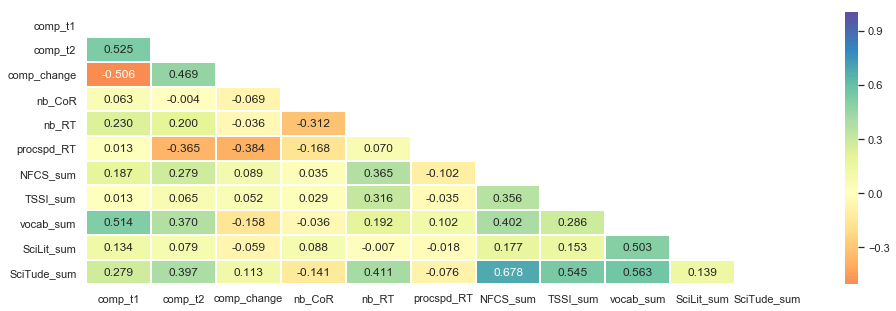

In [310]:
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,5))
sns.heatmap(corr_df, mask=mask, annot=True, cmap='Spectral',
            fmt='.3f', linewidths=1, center=0
           ).get_figure().savefig('correlations.png')

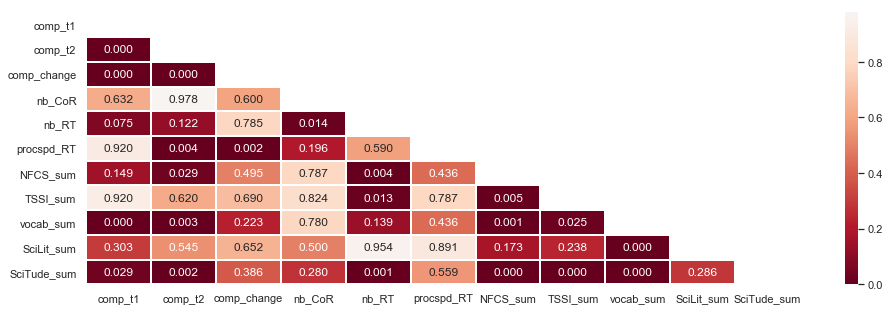

In [311]:
mask = np.zeros_like(sig_df)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(16,5))
sns.heatmap(sig_df, mask=mask, annot=True, cmap='RdBu',
            fmt='.3f', linewidths=1, center=1
           ).get_figure().savefig('significance.png')

## All figures - Bar plots

c:\users\ia406477\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


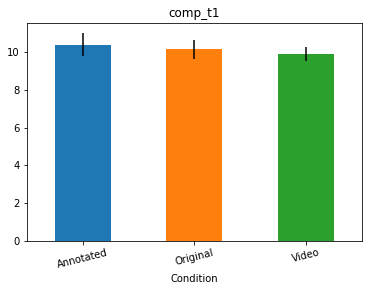

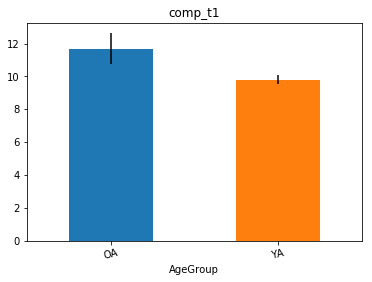

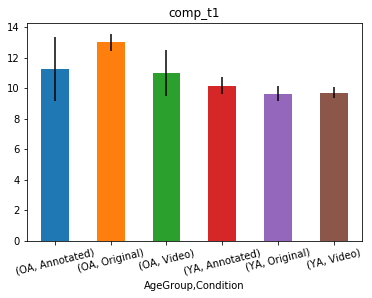

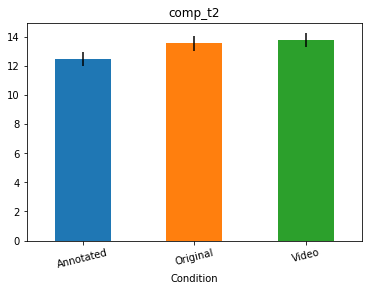

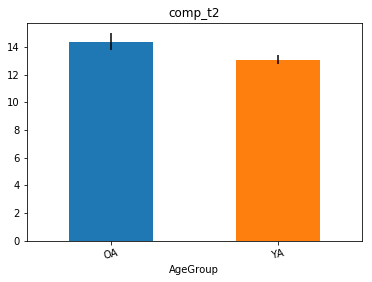

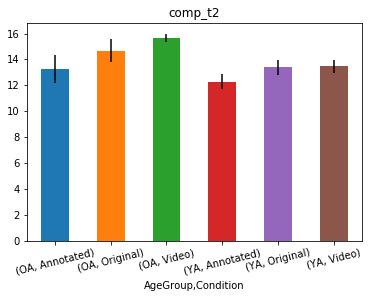

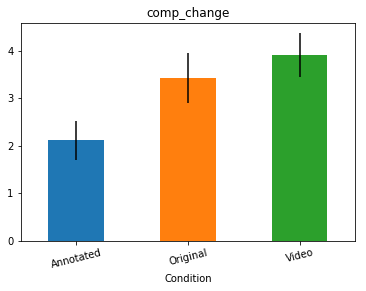

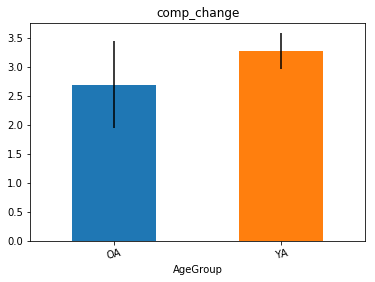

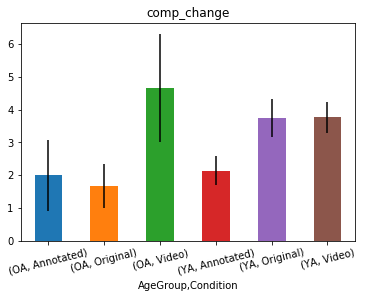

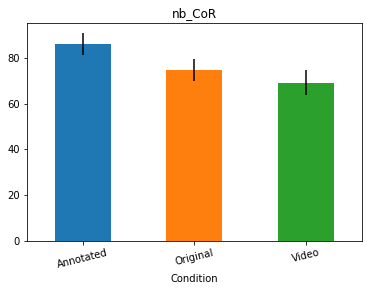

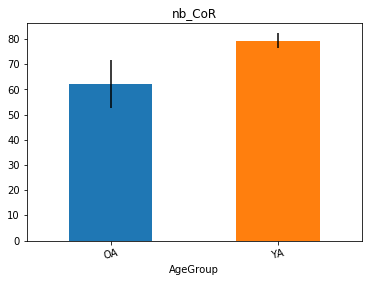

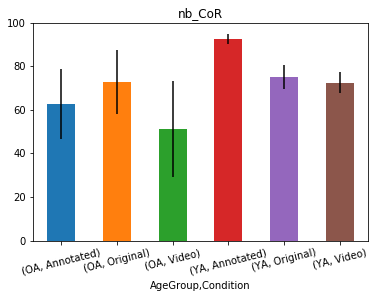

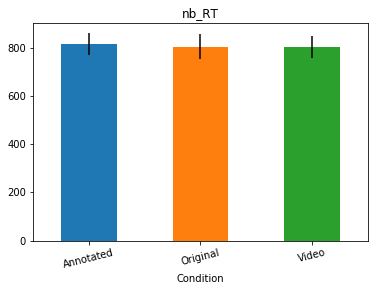

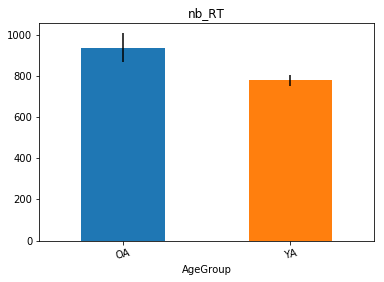

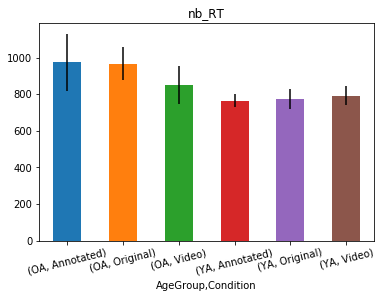

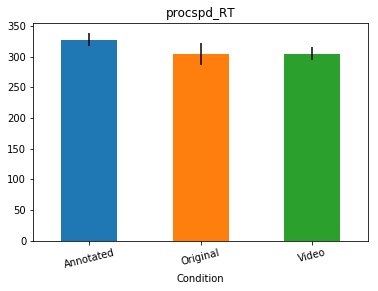

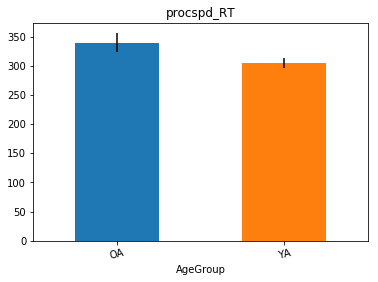

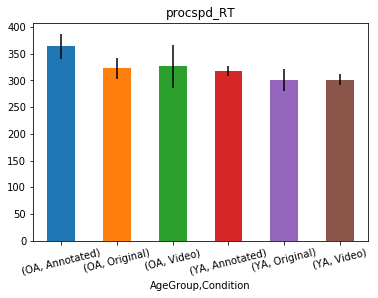

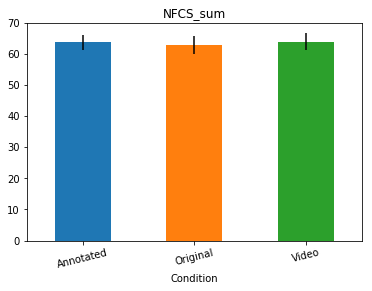

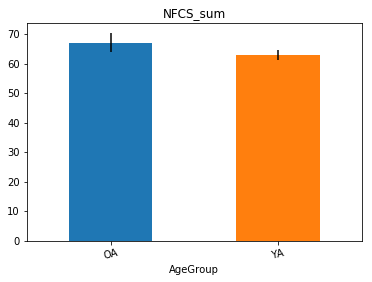

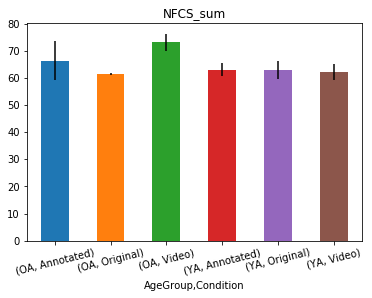

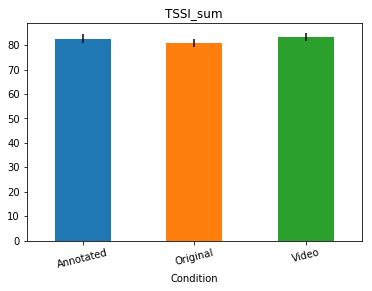

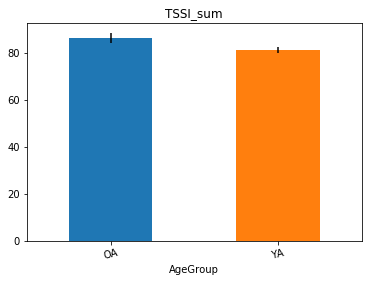

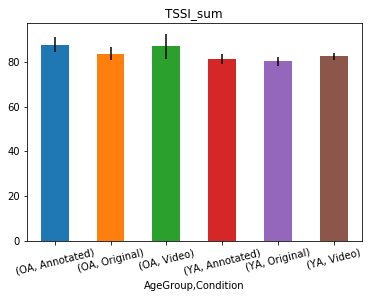

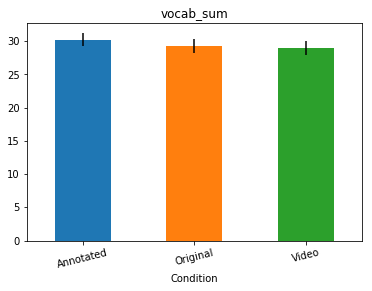

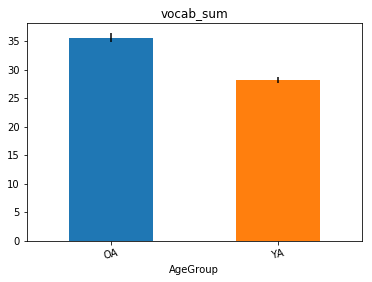

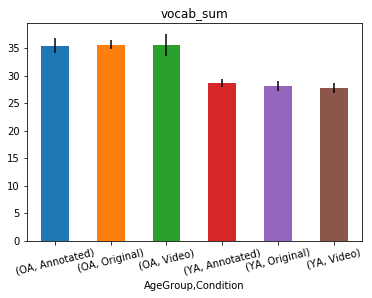

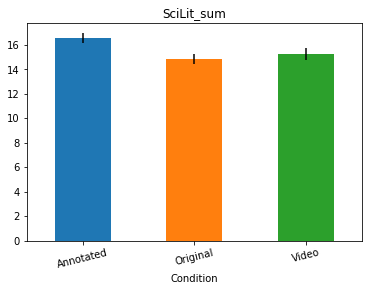

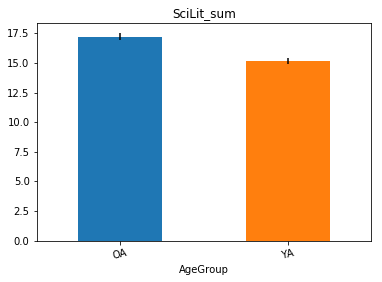

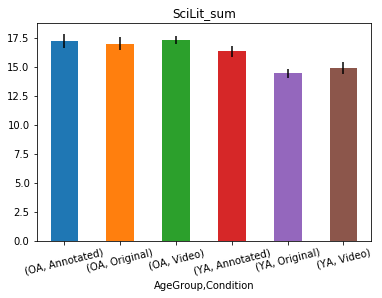

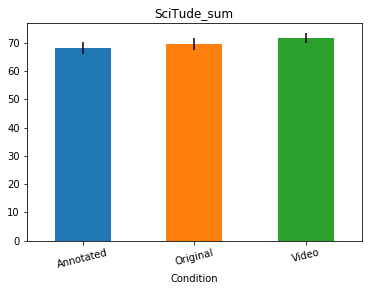

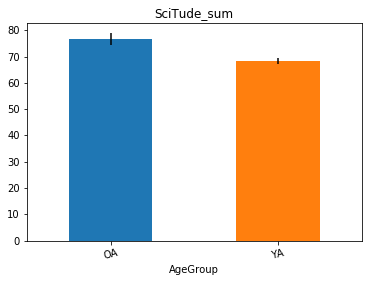

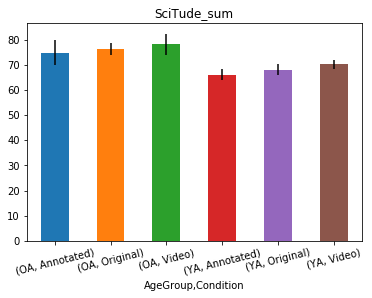

In [10]:
for var in vars_of_interest:
    for grp in grps_of_interest:
        fpath = os.path.join('..','derivatives','figures',var+'_'+''.join(grp)+'.png')
        means = data.groupby(grp).mean()
        sem = data.groupby(grp).sem()
        plot = means.plot.bar(
            y=var,yerr=sem,xticks=np.arange(0,max(data[var]),
                                            step=np.rint(max(data[var])*(1/5))),
            legend=False,title=var,rot=14
        ).get_figure().savefig(fpath)

## Figure generation - Swarm, Strip, and Box plots

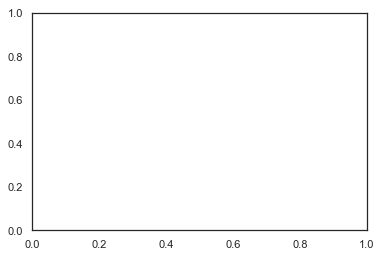

In [11]:
sns.set(style='white')
for var in vars_of_interest:
    for grp in grps_of_interest:
        df = data.set_index(grp)
        fpath = os.path.join('..','derivatives','figures',var+'_'+''.join(grp)+'_swarm.png')
        ax = sns.swarmplot(x=var,y=df.index,data=df)
        ax.get_figure().savefig(fpath)
        ax.clear()